In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [123]:
df1 = pd.read_csv("Mumbai1.csv")

In [124]:
df1.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1 BHK,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1 BHK,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1 BHK,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1 BHK,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1 BHK,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [125]:
df1.shape

(6347, 18)

To keep the model simple I would drop certain columns.

In [126]:
df1.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children s Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool'],
      dtype='object')

In [127]:
df2 = df1.drop(['New/Resale','Intercom','Indoor Games','Landscaped Gardens','Jogging Track'],axis='columns')

In [128]:
df2.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool
0,4850000,720,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0
1,4500000,600,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1
2,6700000,650,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1
3,4500000,650,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0
4,5000000,665,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0


In [129]:
df2.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children s Play Area    0
Clubhouse               0
Gas Connection          0
Swimming Pool           0
dtype: int64

info shows that there is no null value in the data, however if there are NA's either we can have median or use drop na.

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   object
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   object
 4   Gymnasium             6347 non-null   int64 
 5   Lift Available        6347 non-null   int64 
 6   Car Parking           6347 non-null   int64 
 7   Maintenance Staff     6347 non-null   int64 
 8   24x7 Security         6347 non-null   int64 
 9   Children s Play Area  6347 non-null   int64 
 10  Clubhouse             6347 non-null   int64 
 11  Gas Connection        6347 non-null   int64 
 12  Swimming Pool         6347 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 644.7+ KB


Location and no. of bedrooms shows data type as object where no. of bedrooms should be changed to numerical from string value.

In [131]:
df2['No. of Bedrooms'].unique()

array(['1 BHK', '4 BHK', '3 BHK', '3', '2 BHK', '2', '1', '4', '5', '6',
       '26', '5 BHK', '7', '43'], dtype=object)

In [132]:
#creating new column and using lambda function to split number and string value
df2['bhk'] = df2['No. of Bedrooms'].apply(lambda x: int(x.split(' ')[0]))

In [133]:
df2.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk
0,4850000,720,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1
1,4500000,600,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1
2,6700000,650,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1
3,4500000,650,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1
4,5000000,665,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1


In [134]:
df2['bhk'].unique()

array([ 1,  4,  3,  2,  5,  6, 26,  7, 43], dtype=int64)

no.of bedrooms shows 2 values where bedrooms are more than normal and we can check.

In [135]:
df2[df2.bhk>20]

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk
977,50000000,7000,Kalyan,26,0,0,1,1,1,0,0,0,0,26
1712,120000000,2600,Khar West,43,1,1,1,0,1,0,0,1,0,43


There seems like an error where 2600 sqft or 7000 sqft houses cannot have so many bed rooms.

In [136]:
df2.Area.unique()

array(['720', '600', '650', ..., '250', '1162', '435'], dtype=object)

there is not only whole number but range like 1137-1485, one of the ways is to take average of these 2 numbers

In [137]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [138]:
df2[~df2['Area'].apply(is_float)].head(10)

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk
1607,13799999,1137 - 1485,Kandivali East,2,1,1,0,0,0,1,0,0,1,2


In [139]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [140]:
convert_sqft_to_num('2166')

2166.0

In [141]:
convert_sqft_to_num('1137-1485')

1311.0

creating a new dataframe

In [142]:
df3 = df2.copy()
df3['Area'] = df3['Area'].apply(convert_sqft_to_num)
df3.head(3)

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk
0,4850000,720.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1
1,4500000,600.0,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1
2,6700000,650.0,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1


In [143]:
df3.loc[30]

Price                    8500000
Area                      1114.0
Location                Kharghar
No. of Bedrooms            2 BHK
Gymnasium                      1
Lift Available                 1
Car Parking                    1
Maintenance Staff              1
24x7 Security                  1
Children s Play Area           1
Clubhouse                      1
Gas Connection                 1
Swimming Pool                  1
bhk                            2
Name: 30, dtype: object

In [144]:
df3.head(3)

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk
0,4850000,720.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1
1,4500000,600.0,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1
2,6700000,650.0,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1


Feature engineering and dimensionality techniques

In [145]:
df4 = df3.copy()

creating price per sqft(new feature), this will help in outlier detection and removal in the later stage

In [146]:
df4['price_per_sqft'] = df4['Price']*100000/df4['Area']
df4.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk,price_per_sqft
0,4850000,720.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.736111e+08
1,4500000,600.0,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1,7.500000e+08
2,6700000,650.0,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1,1.030769e+09
3,4500000,650.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.923077e+08
4,5000000,665.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,7.518797e+08


In [147]:
df4.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [148]:
len(df4.Location.unique())

413

If we keep all the locations this will create around 400 columns which is too many feature This is high dimensionality curse. Technique is to come up with other category by finding how many data points are available.

In [149]:
df4.Location = df4.Location.apply(lambda x:x.strip())
location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Borivali West           176
                       ... 
Pokhran Road No 2         1
Poonam Sagar Complex      1
Ramdev Park               1
Ranjanpada                1
worli sea face            1
Name: Location, Length: 413, dtype: int64

In [150]:
len(location_stats[location_stats<=10])

324

In [151]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Location
Sector 19 Kharghar      10
Sion                    10
Majiwada                10
Lower Parel              9
Sector12 Kamothe         9
                        ..
Pokhran Road No 2        1
Poonam Sagar Complex     1
Ramdev Park              1
Ranjanpada               1
worli sea face           1
Name: Location, Length: 324, dtype: int64

In [152]:
len(df4.Location.unique())

413

In [153]:
df4.Location = df4.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.Location.unique())

90

In [154]:
df4.head(10)

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk,price_per_sqft
0,4850000,720.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.736111e+08
1,4500000,600.0,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1,7.500000e+08
2,6700000,650.0,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1,1.030769e+09
3,4500000,650.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.923077e+08
4,5000000,665.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,7.518797e+08
5,17000000,2000.0,Kharghar,4 BHK,1,1,1,1,1,1,1,0,1,4,8.500000e+08
6,12500000,1550.0,Kharghar,3 BHK,0,1,1,1,1,0,0,1,0,3,8.064516e+08
7,10500000,1370.0,other,3,0,1,1,1,1,0,0,0,0,3,7.664234e+08
8,10500000,1356.0,Kharghar,3 BHK,1,1,1,1,1,0,1,0,1,3,7.743363e+08
9,15000000,1680.0,Kharghar,3 BHK,1,1,1,1,1,1,1,1,1,3,8.928571e+08


In [155]:
df4[df4.Area/df4.bhk<300].head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk,price_per_sqft
239,11200000,573.0,Ulwe,2,1,1,1,1,1,1,1,0,1,2,1.954625e+09
503,4000000,568.0,Bhiwandi,2,1,1,1,1,1,1,0,0,0,2,7.042254e+08
545,6600000,550.0,Thane,2,1,1,1,1,1,0,1,0,0,2,1.200000e+09
546,6900000,565.0,Thane,2,1,1,1,1,1,0,1,0,0,2,1.221239e+09
547,6800000,547.0,Thane,2,1,1,1,1,1,0,1,0,0,2,1.243144e+09


In [156]:
df4.shape

(6347, 15)

In [157]:
df5 = df4[~(df4.Area/df4.bhk<300)]

In [158]:
df5.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children s Play Area,Clubhouse,Gas Connection,Swimming Pool,bhk,price_per_sqft
0,4850000,720.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.736111e+08
1,4500000,600.0,Kharghar,1 BHK,1,1,1,1,1,0,1,0,1,1,7.500000e+08
2,6700000,650.0,Kharghar,1 BHK,1,1,1,1,1,1,1,0,1,1,1.030769e+09
3,4500000,650.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,6.923077e+08
4,5000000,665.0,Kharghar,1 BHK,0,1,1,1,1,0,0,0,0,1,7.518797e+08


In [159]:
df5.shape

(6185, 15)

In [160]:
df5.price_per_sqft.describe()

count    6.185000e+03
mean     1.345256e+09
std      9.575740e+08
min      1.597444e+08
25%      7.142857e+08
50%      1.030769e+09
75%      1.701702e+09
max      1.099505e+10
Name: price_per_sqft, dtype: float64

In [161]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(4799, 15)

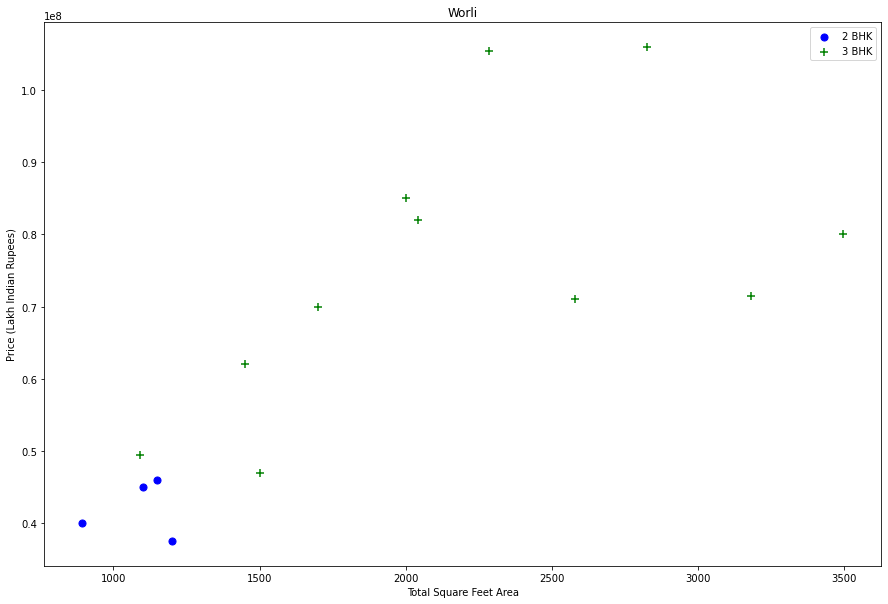

In [162]:
def plot_scatter_chart(df,Location):
    bhk2 = df[(df.Location==Location) & (df.bhk==2)]
    bhk3 = df[(df.Location==Location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df6,"Worli")

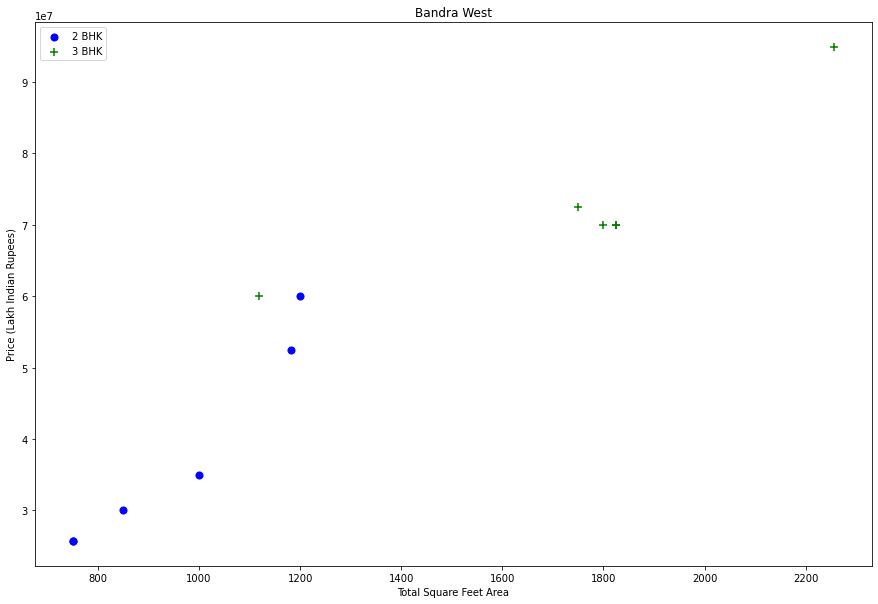

In [163]:
plot_scatter_chart(df6,"Bandra West")

Data does not show any anamolies and as the bedrooms increase, the price increases accordingly. So, there is a linear relationship between area and price per sq ft.

In [164]:
df6[df6.bhk<2].mean()

Price                   5.978065e+06
Area                    6.132101e+02
Gymnasium               4.391965e-01
Lift Available          7.643865e-01
Car Parking             5.135722e-01
Maintenance Staff       2.654723e-01
24x7 Security           5.287731e-01
Children s Play Area    5.000000e-01
Clubhouse               3.659066e-01
Gas Connection          2.258415e-01
Swimming Pool           3.230185e-01
bhk                     1.000000e+00
price_per_sqft          9.821812e+08
dtype: float64

In [165]:
df6[df6.bhk<2].std()

Price                   3.572856e+06
Area                    1.287810e+02
Gymnasium               4.964239e-01
Lift Available          4.244969e-01
Car Parking             4.999515e-01
Maintenance Staff       4.417043e-01
24x7 Security           4.993070e-01
Children s Play Area    5.001358e-01
Clubhouse               4.818143e-01
Gas Connection          4.182488e-01
Swimming Pool           4.677567e-01
bhk                     0.000000e+00
price_per_sqft          5.408392e+08
dtype: float64

In [166]:
import seaborn as sns

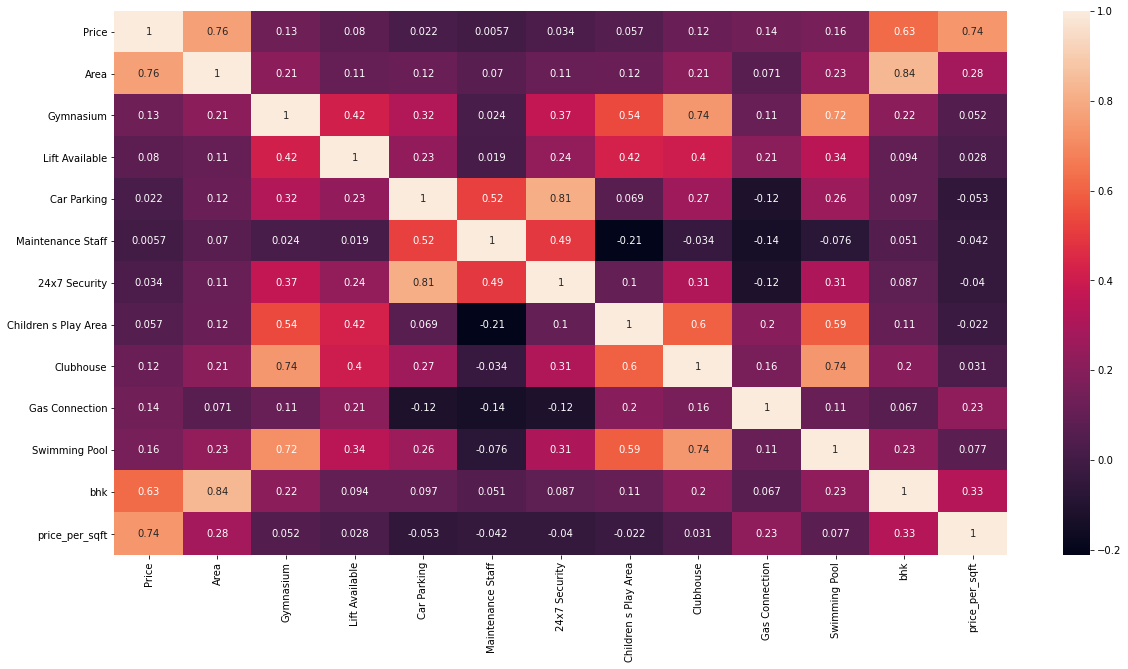

In [61]:
corr = sns.heatmap(df6.corr(), annot=True)

In [62]:
df6.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children s Play Area', 'Clubhouse', 'Gas Connection', 'Swimming Pool',
       'bhk', 'price_per_sqft'],
      dtype='object')

In [63]:
df7 = df6.drop(['price_per_sqft','No. of Bedrooms','Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children s Play Area', 'Clubhouse', 'Gas Connection', 'Swimming Pool',],axis='columns')

In [65]:
df7.head()

,Price,Area,Location,bhk
0,14900000,1245.0,Airoli,2
1,14000000,1183.0,Airoli,2
2,14800000,1245.0,Airoli,2
3,11100000,1050.0,Airoli,2
4,7500000,600.0,Airoli,1


As ML cannot recognise text column which is location that has to be changed to numerical by using one-hot encoding

In [67]:
dummies = pd.get_dummies(df7.Location)
dummies.head(3)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df8 = pd.concat([df7, dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,Price,Area,Location,bhk,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,14900000,1245.0,Airoli,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000000,1183.0,Airoli,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14800000,1245.0,Airoli,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11100000,1050.0,Airoli,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7500000,600.0,Airoli,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df9 = df8.drop('Location', axis = 'columns')
df9.head(2)

,Price,Area,bhk,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,14900000,1245.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000000,1183.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df9.shape

(4799, 92)

In [75]:
X = df9.drop('Price', axis='columns')
X.head()

,Area,bhk,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,1245.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1183.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1245.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = df9.Price
y.head()

0    14900000
1    14000000
2    14800000
3    11100000
4     7500000
Name: Price, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8614275536049512

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84131631, 0.85577089, 0.86071841, 0.88511346, 0.86638489])

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.861861,{'normalize': False}
1,lasso,0.861861,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.852032,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


all the models give the best score as the data is already clean and show linear relationship b/w price and the area.

In [85]:
def predict_price(Location,sqft,bhk):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[2] = bhk
  
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [86]:
predict_price('Kharghar',1000, 2)

10493614.421614625

In [87]:
import pickle
with open('mumbai_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [88]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

we can use A/B testing to compare between old and new models